# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

In [4]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 
import scipy.stats as stats
from scipy.stats import pearsonr
import statsmodels.formula.api as smf
import numpy as np

In [5]:
#load data
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Part I : EDA - Exploratory Data Analysis

In [6]:
data.shape #shape of dataset

(768, 9)

In [7]:
data.info() #dataset summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Explanation:** Here we can say that Outcome is a Binary categorical variable. Other columns are numerical columns

**Note:** Lets do some EDA and find the answers of some questions.

- **Are there any missing values in the dataset?**

In [9]:
#the above summary shows that all the values are non-null in each column. We can also check in another way like
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Explanation:** its a straightforward approach to depict the null value count and our data is free from null values.

- **How are the predictor variables related to the outcome variable?**

In [10]:
#lets spit the predictor and outcome variables
X=data.drop(columns=['Outcome'])
y=data['Outcome']
print('X shape: ',X.shape)
print('y shape: ',y.shape)

X shape:  (768, 8)
y shape:  (768,)


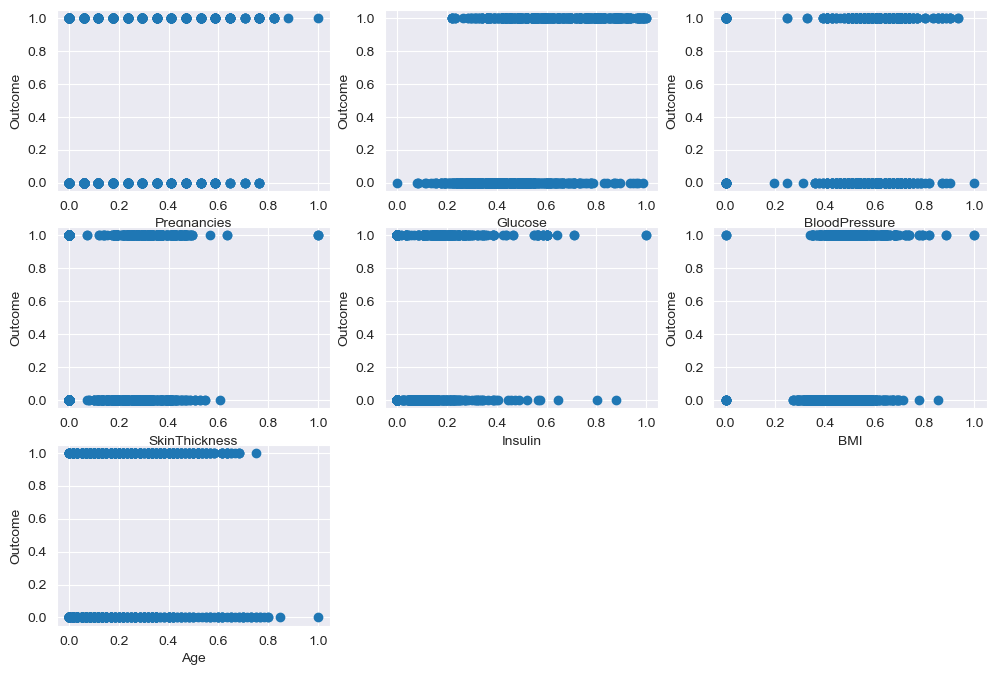

In [91]:
i=1
plt.figure(figsize=(12,8))
for col in X.columns:
    plt.subplot(3,3,i,)
    plt.scatter(X[col],y)
    plt.xlabel(col)
    plt.ylabel('Outcome')
    i=i+1
plt.show()

In [12]:
# Lets use Scipy.stats.pointbiserialr to find the relation between the predictors and outcome variables.
# Also the Point-biserial correlation is symmetric

Text(0.5, 1.0, 'Correlation between Outcome and')

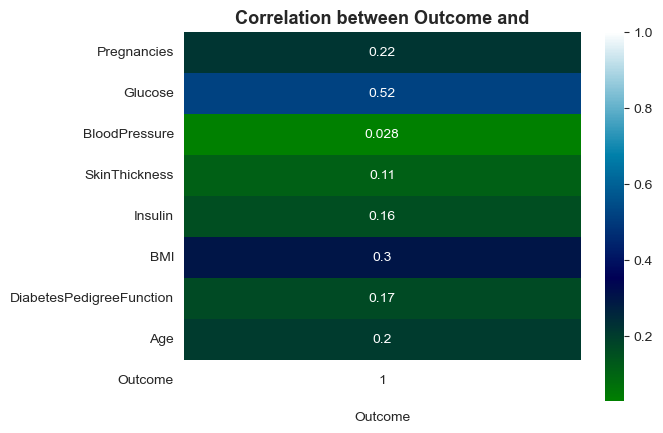

In [93]:
corr_Outcome = data.corr()[['Outcome']]
sns.heatmap(corr_Outcome, annot=True, cbar=True, cmap='ocean')
plt.title("Correlation between Outcome and", fontsize=13, fontweight='bold')

Glucose is highly correlated to target

In [13]:
for col in X.columns:
    corr,pval=stats.pointbiserialr(X[col],y)
    print(f'{col}- corr: {corr}, p-value: {pval}')

Pregnancies- corr: 0.22189815303398686, p-value: 5.065127298051249e-10
Glucose- corr: 0.46658139830687406, p-value: 8.935431645286498e-43
BloodPressure- corr: 0.06506835955033283, p-value: 0.07151390009773193
SkinThickness- corr: 0.07475223191831934, p-value: 0.03834770482047633
Insulin- corr: 0.13054795488404775, p-value: 0.000286186460360213
BMI- corr: 0.29269466264444544, p-value: 1.2298074873111402e-16
DiabetesPedigreeFunction- corr: 0.17384406565296007, p-value: 1.254607010148255e-06
Age- corr: 0.23835598302719774, p-value: 2.209975460664566e-11


**Explanation:** As all the p-values are <0.05 except 'BloodPressure'.Therefore the rest of the columns are having statistically significant correlation with Outcome variable

- **What is the correlation between the predictor variables?**

In [14]:
X.corr() #correlation cofficients

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


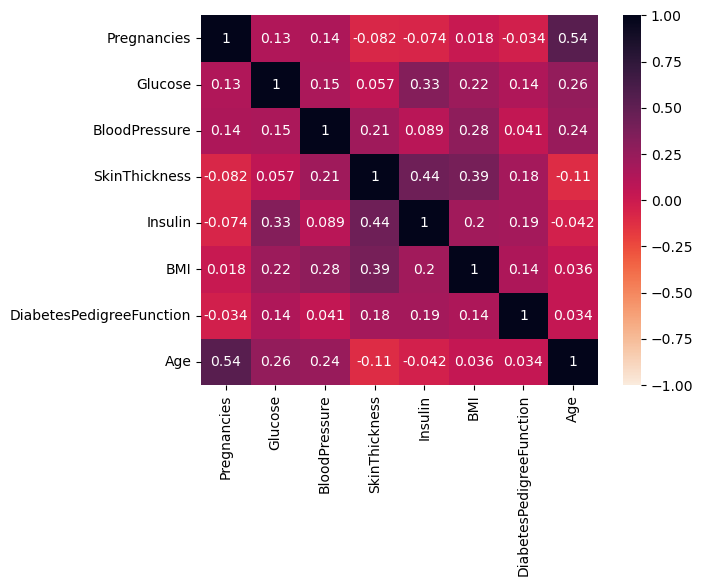

In [15]:
sns.heatmap(X.corr(), vmin=-1, vmax=1,annot=True,cmap="rocket_r")
plt.show()

**Explanation:** From the corr matrix and above heat map it shows that the predictors are Low correlation between each other.

- **What is the distribution of each predictor variable?**

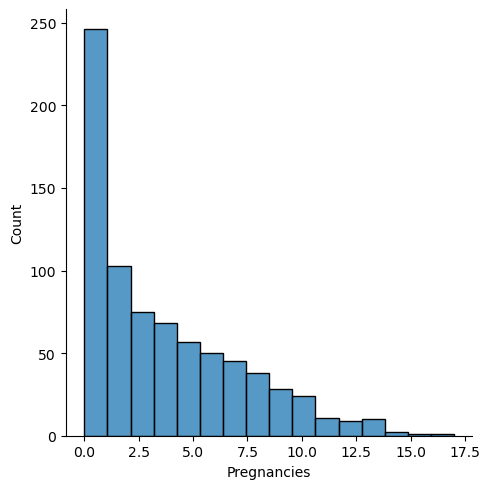

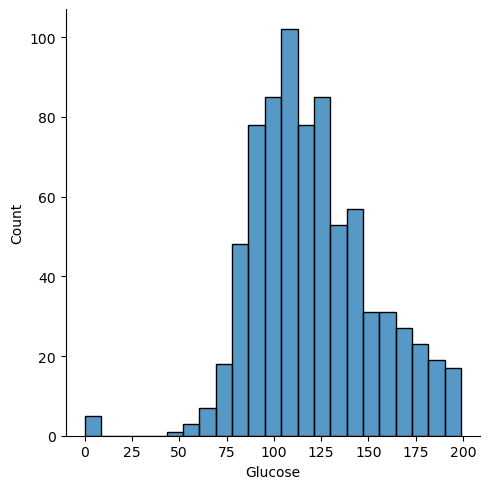

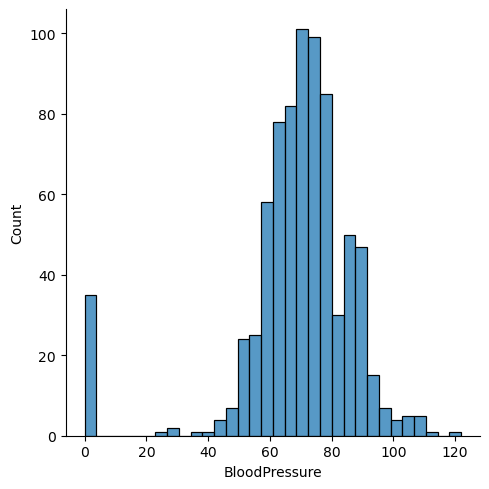

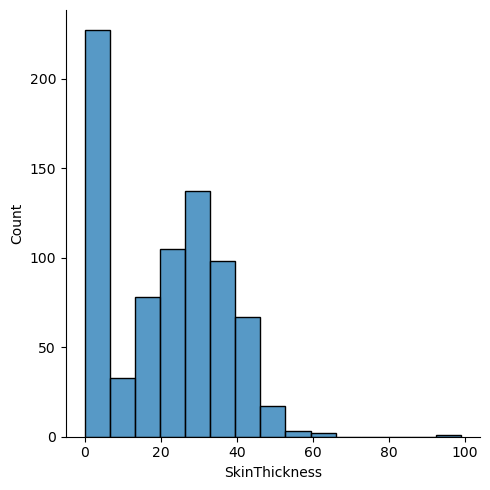

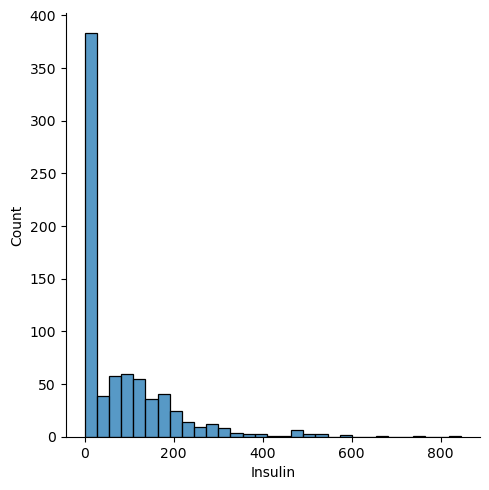

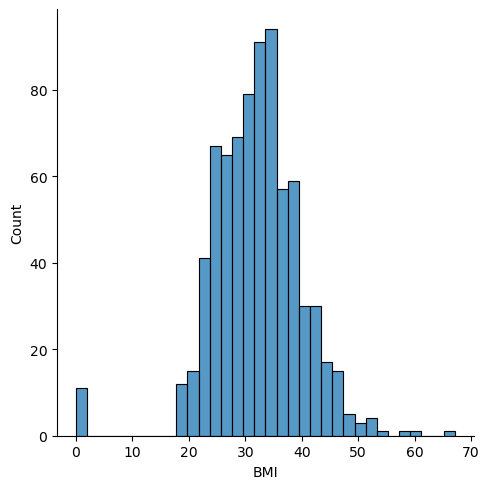

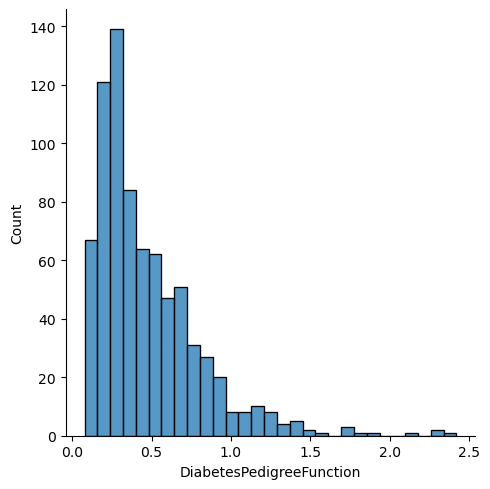

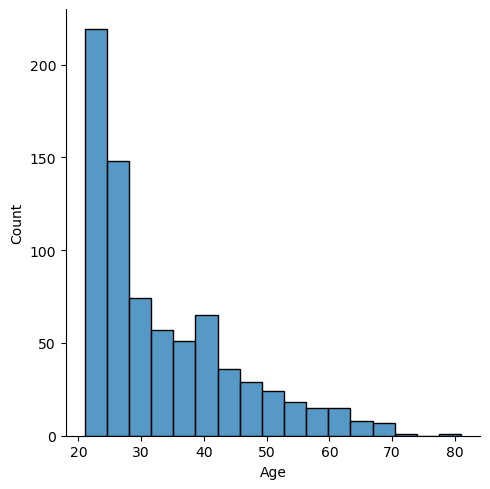

In [16]:
for col in X.columns:
    sns.displot(X[col])

**Explanation:** From the above distributions we find that some of the distributions tend to be normal but have some uncertain values for example ,distribution of BMI is normal but affected by some noise may be outliers.There is also negatively skewed and positively skewed distributions.

- **Are there any outliers in the predictor variables?**

In [17]:
X.describe() #descriptive way to find the outliers.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


**Explanation:** For the columns where the mean is so small compared to the max value indicates the max value is an outlier. Therefore we can detect that our predictors have some outliers.

<AxesSubplot:>

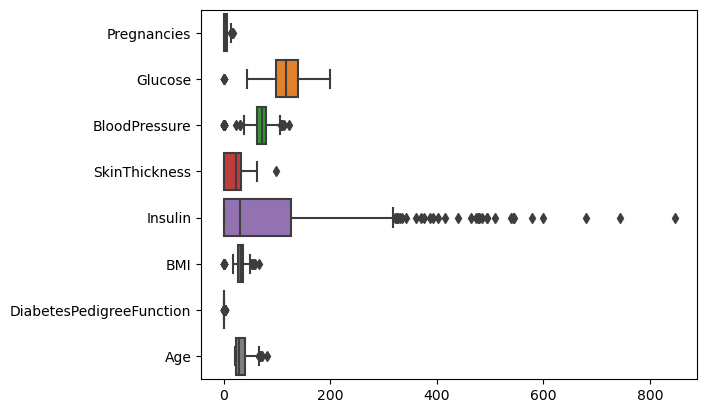

In [18]:
#Use visualizations to detect outliers
sns.boxplot( data = X, orient="h")

**Explanation:**  From these box plots we can clearly feel the presence of outliers in our dataset.

- **How are the predictor variables related to each other?**

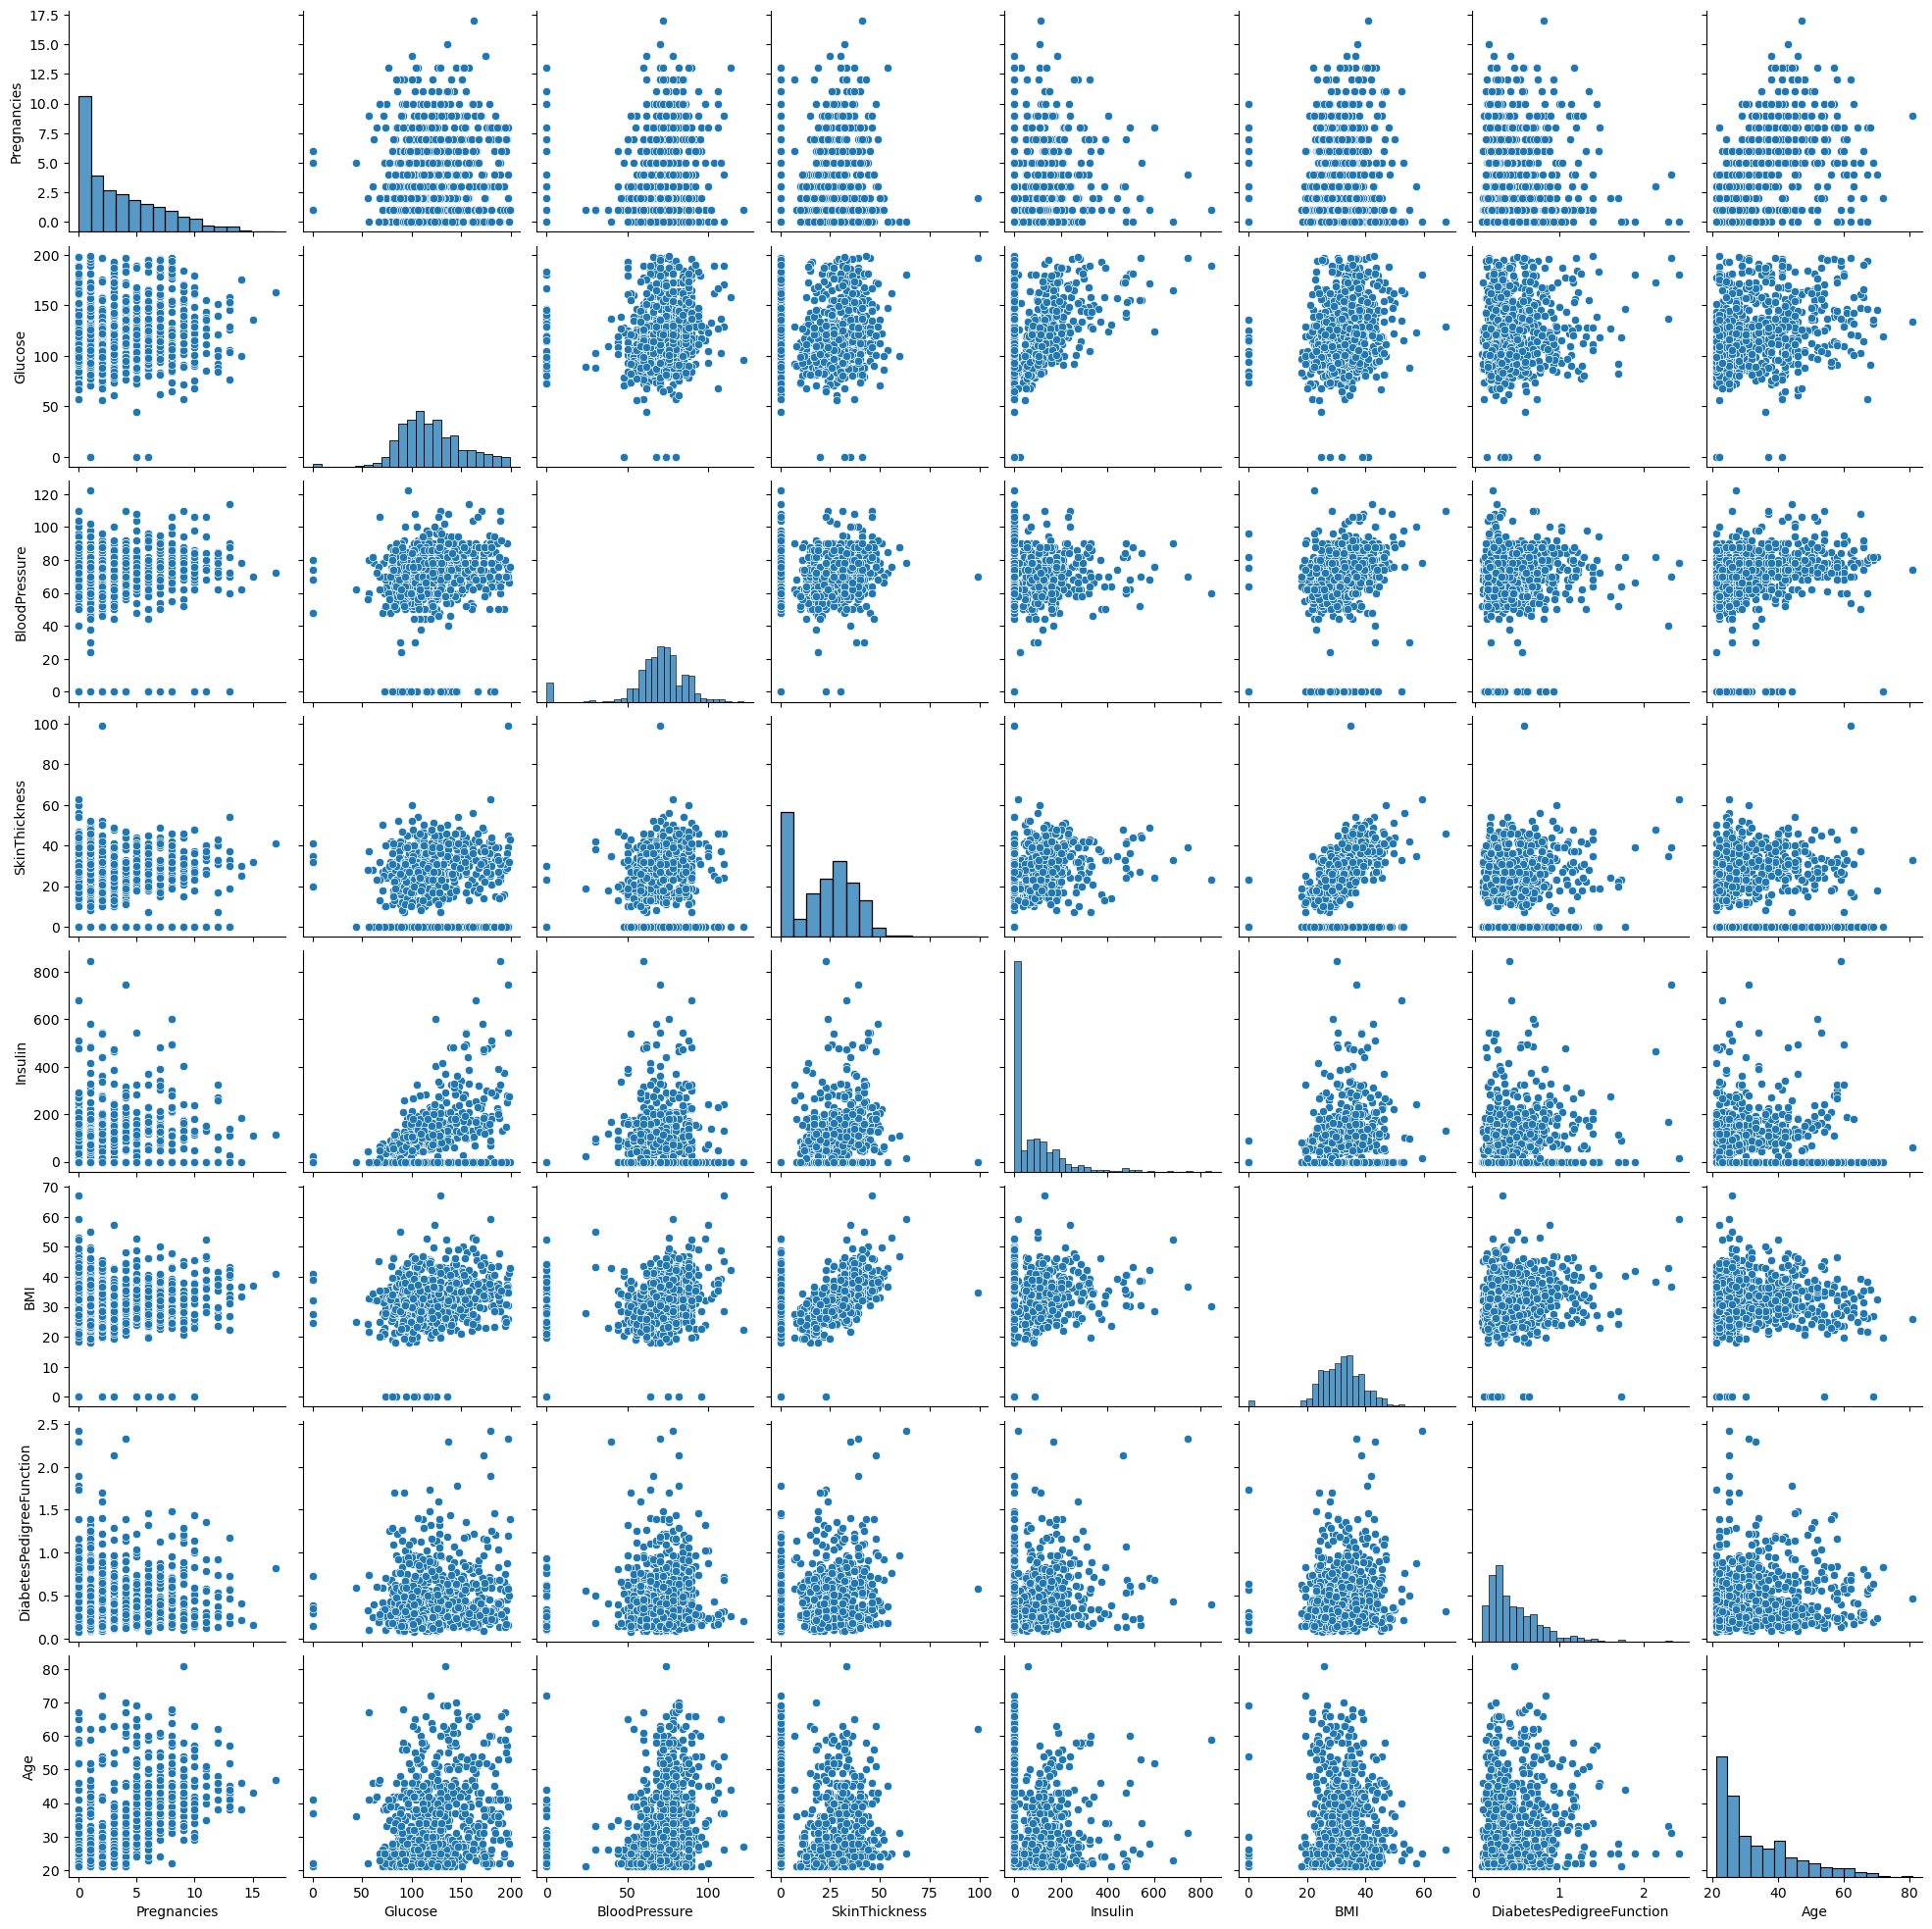

In [19]:
sns.pairplot(X)

**Explanation:** The pairplot is a quick way to visually find the relation between two variables.
- Lets calculate the p-values using pearsonr test to find the significance of correlations

In [20]:
#create a p-value matrix of data variables
def corr_pval(X):
    corr_pval_df = pd.DataFrame(index=X.columns, columns=X.columns)
    for i in range(len(corr_pval_df.index)):
        for c in range(len(corr_pval_df.columns)):
            stat,corr_pval_df.iloc[i, c] = pearsonr(X[corr_pval_df.index[i]], X[corr_pval_df.columns[c]])
    return corr_pval_df
pvalue_matrix=corr_pval(X)
pvalue_matrix.apply(pd.to_numeric).style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,0.000000,0.000322,0.000085,0.023608,0.041621,0.624638,0.353535,0.000000
Glucose,0.000322,0.000000,0.000022,0.112414,0.000000,0.000000,0.000135,0.000000
BloodPressure,0.000085,0.000022,0.000000,0.000000,0.013683,0.000000,0.253374,0.000000
SkinThickness,0.023608,0.112414,0.000000,0.000000,0.000000,0.000000,0.000000,0.001558
Insulin,0.041621,0.000000,0.013683,0.000000,0.000000,0.000000,0.000000,0.243182
BMI,0.624638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000092,0.315833
DiabetesPedigreeFunction,0.353535,0.000135,0.253374,0.000000,0.000000,0.000092,0.000000,0.352980
Age,0.000000,0.000000,0.000000,0.001558,0.243182,0.315833,0.352980,0.000000


**Explanation:** This is a kind of heat map for p-values. Darker slabs represents insignificant correlations.

- Is there any interaction effect between the predictor variables?

In [21]:
# Lets introduce interaction terms to find the effect
log_reg = smf.logit("""Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + 
                    DiabetesPedigreeFunction + Age +Pregnancies:Glucose+ BMI:DiabetesPedigreeFunction + 
                    Pregnancies:BloodPressure""", data=data).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.468806
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      756
Method:                           MLE   Df Model:                           11
Date:                Wed, 18 Oct 2023   Pseudo R-squ.:                  0.2752
Time:                        09:26:53   Log-Likelihood:                -360.04
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 3.459e-52
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -9.9589      1.223     -8.143      0.000

**Explanation:** We can see that there is no interaction effect present between variables as the p-values of interaction terms is higher than the threshold value.

- **What is the average age of the individuals in the dataset?**

In [22]:
avg_age=data.loc[:, 'Age'].mean()
print('Average age: ',avg_age)

Average age:  33.240885416666664


- **What is the average glucose level for individuals with diabetes and without diabetes?**

In [23]:
data[['Glucose','Outcome']].groupby(['Outcome']).mean()

,Glucose
Outcome,
0,109.980000
1,141.257463


**Explanation:** outcome 0 value represents the individuals without diabetes and 1 value represents with diabetes. 

- **What is the average BMI for individuals with diabetes and without diabetes?**

In [24]:
data[['BMI','Outcome']].groupby(['Outcome']).mean()

,BMI
Outcome,
0,30.304200
1,35.142537


- **How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?**

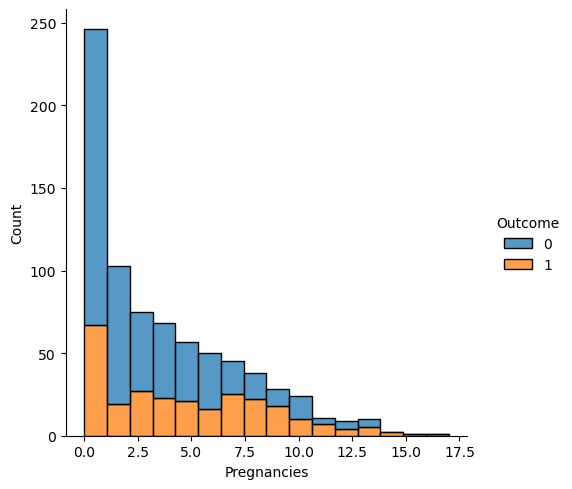

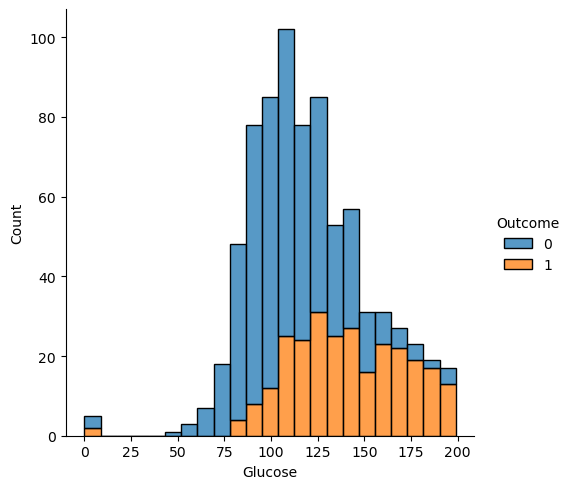

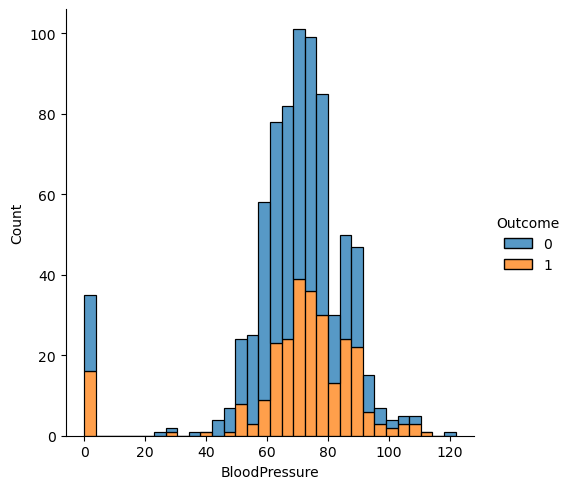

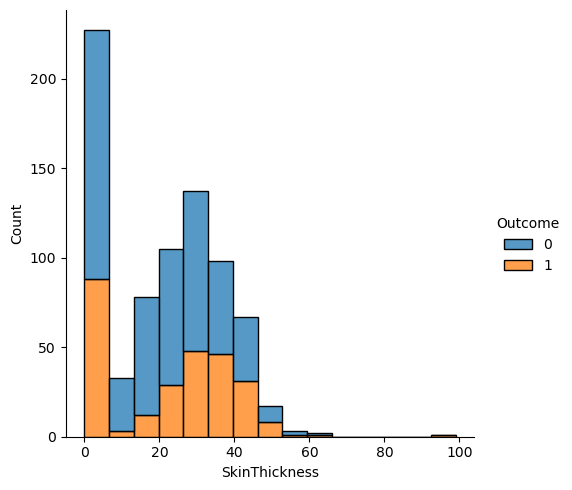

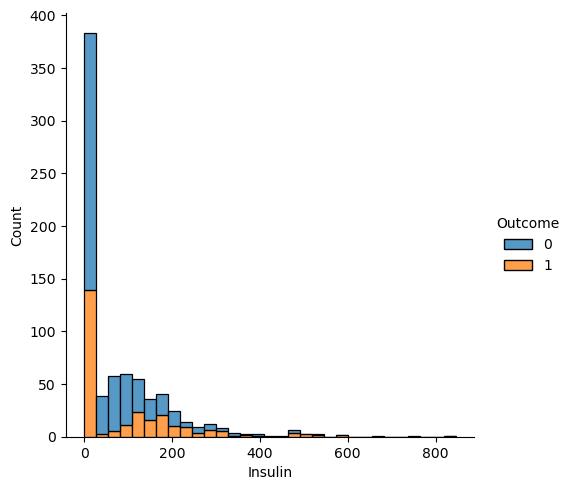

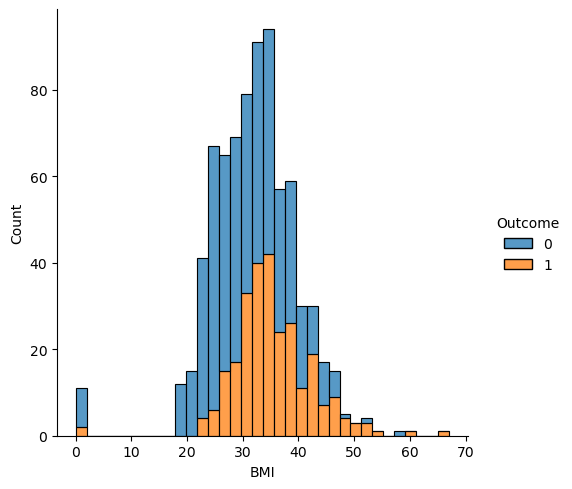

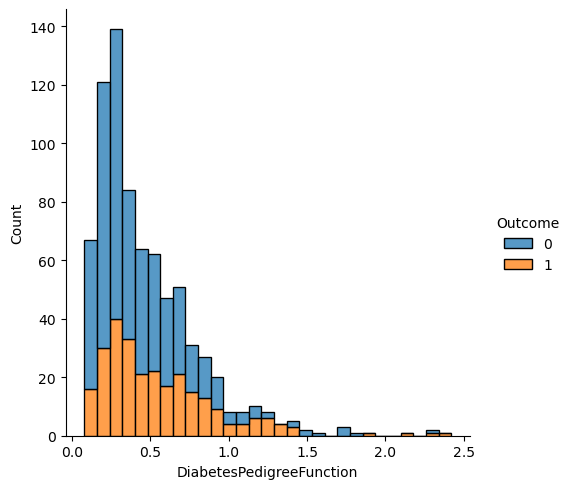

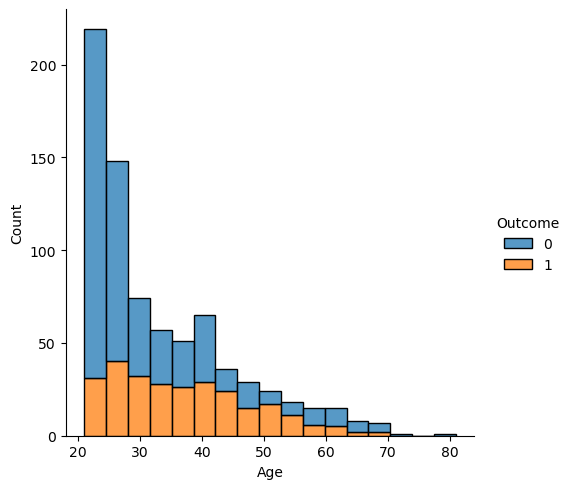

In [25]:
for col in X.columns:
    sns.displot(data=data, x=col, hue="Outcome", multiple="stack")

**Explanation:** From the above distributions we can easily identify the diabetes effect .

- **Are there any differences in the predictor variables between males and females (if gender information is available)?**

**Note:** There is no gender information available to distinguish between male and females

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset.

- **Handling missing values**

In [26]:
data['BMI'].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64

In [27]:
data['SkinThickness'].value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, dtype: int64

**Explanation:** We have determined before that out dataset does not contains any Null values. But we can see that some columns have 0 value which could be insignificant like SkinThickness could'nt be 0. But for now we keep these values as it is. Possiblly this values are outliers than we can detect these while dealing with outliers.

- **Handling outliers**

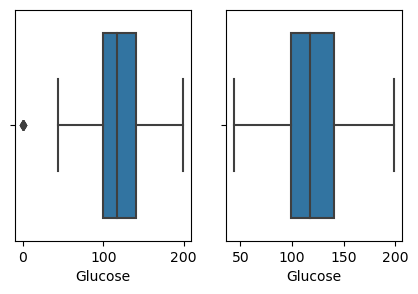

In [28]:
# We have already detected that out dataset contains outliers.
def drop_outliers(df,field_name):
    iqr=1.5*(np.percentile(df[field_name],75)-np.percentile(df[field_name],25))
    df.drop(df[df[field_name]>(iqr+np.percentile(df[field_name],75))].index,inplace=True)
    df.drop(df[df[field_name]<(np.percentile(df[field_name],25)-iqr)].index,inplace=True)
plt.figure(figsize=(5,3))
#graph before outliers removal
plt.subplot(1,2,1)
sns.boxplot(data['Glucose'])

drop_outliers(data,'Glucose')
#graph after outliers removal
plt.subplot(1,2,2)
sns.boxplot(data['Glucose'])
plt.show()

In [29]:
#lets reset the value of X and y
X=data.drop(columns=['Outcome'])
y=data['Outcome']
print('X shape: ',X.shape)
print('y shape: ',y.shape)

X shape:  (763, 8)
y shape:  (763,)


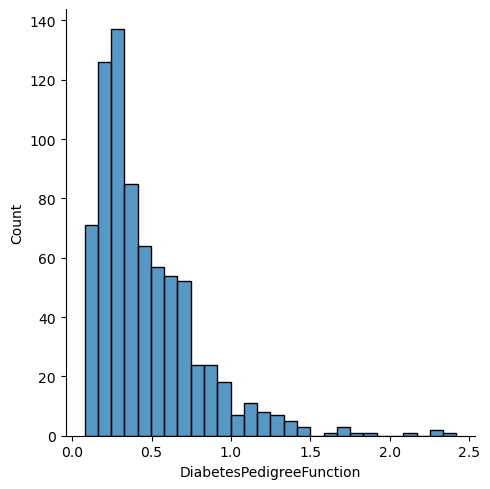

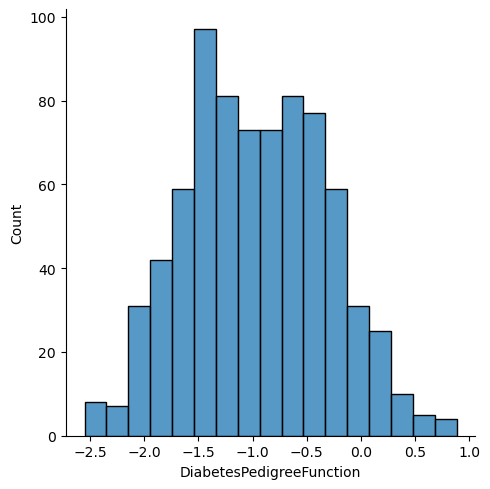

In [30]:
#log transformation
sns.displot(X['DiabetesPedigreeFunction'])
X['DiabetesPedigreeFunction']=np.log(X['DiabetesPedigreeFunction'])
sns.displot(X['DiabetesPedigreeFunction'])

**Explanation:** This transformation shows we dont have to every time drop the outliers , some transformations also workes best to handle these.

- **Handling imbalanced data**

In [31]:
#lets detect the imbalace class
y.value_counts()

0    497
1    266
Name: Outcome, dtype: int64

In [32]:
#we can see that there is a significant imbalance present in the target class
no=len(y[y==0])
yes=len(y[y==1])
print('no: ',no)
print('Yes: ',yes)


no:  497
Yes:  266


In [33]:
from sklearn.utils import resample
# Separate majority and minority classes
df_no = data[data['Outcome']==0] #majority
df_yes =data[data['Outcome']==1] #minority
 
# Upsample minority class
df_minority_upsampled = resample(df_yes, 
                                 replace=True,     # sample with replacement
                                 n_samples=497,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_no, df_minority_upsampled])
 
# Display new class counts
df_upsampled['Outcome'].value_counts()

0    497
1    497
Name: Outcome, dtype: int64

In [34]:
#refresh values
data=df_upsampled.copy()
X=data.drop(columns=['Outcome'])
y=data['Outcome']

In [35]:
data.shape

(994, 9)

- **Feature Engineering**

In [36]:
#use model for feature selection
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)


In [37]:
X_new.shape

(994, 7)

In [38]:
new_columns=X.columns[model.get_support()] # get the selected column names from model
new_columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age'],
      dtype='object')

In [39]:
#create a new X dataset
X=pd.DataFrame(X_new,columns=new_columns)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,1.0,85.0,66.0,29.0,0.0,26.6,31.0
1,1.0,89.0,66.0,23.0,94.0,28.1,21.0
2,5.0,116.0,74.0,0.0,0.0,25.6,30.0
3,10.0,115.0,0.0,0.0,0.0,35.3,29.0
4,4.0,110.0,92.0,0.0,0.0,37.6,30.0


- **Scaling and normalization**

In [40]:
#Scaling data: as numeric values in each column have different scale

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled_data = scaler.fit_transform(X)

#Normalizing data:
'''
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled_data = scaler.fit_transform(X)'''

'\nfrom sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\n\nX_scaled_data = scaler.fit_transform(X)'

In [41]:
X_scaled_data=pd.DataFrame(X_scaled_data,columns=X.columns)
X_scaled_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,0.058824,0.264516,0.540984,0.292929,0.000000,0.396423,0.166667
1,0.058824,0.290323,0.540984,0.232323,0.111111,0.418778,0.000000
2,0.294118,0.464516,0.606557,0.000000,0.000000,0.381520,0.150000
3,0.588235,0.458065,0.000000,0.000000,0.000000,0.526080,0.133333
4,0.235294,0.425806,0.754098,0.000000,0.000000,0.560358,0.150000
...,...,...,...,...,...,...,...
989,0.352941,0.483871,0.409836,0.222222,0.208038,0.403875,0.200000
990,0.411765,0.632258,0.737705,0.242424,0.567376,0.453055,0.366667
991,0.529412,0.483871,0.655738,0.353535,0.000000,0.432191,0.133333
992,0.000000,0.625806,0.000000,0.000000,0.000000,0.631893,0.133333


In [42]:
#reset value of X
X=X_scaled_data.copy()
X.shape

(994, 7)

# Part III : Training ML Model

- **Train the models: Train the selected models on the training set.**

In [43]:

#split the test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [44]:
X_train.shape

(795, 7)

In [45]:
X_test.shape

(199, 7)

In [46]:
#Support Vector Machines Model

In [47]:
from sklearn import svm
from sklearn.metrics import accuracy_score
model = svm.LinearSVC(random_state=800)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print("SVM Accuracy Score:", accuracy_score(y_test, ypred))

SVM Accuracy Score: 0.7386934673366834


In [48]:
# Random Forest Classifier(Ensemble Model)

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
# fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [50]:
y_pred=rfc.predict(X_test)
print('RandomForestClassifier accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

RandomForestClassifier accuracy score: 0.8693


- **Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC**

In [55]:
import sklearn.metrics as metrics


In [ ]:
# Lets Evaluate these models

**Support Vector Machines Model**

In [60]:
print('Support Vector Machines Model')
print(metrics.classification_report(y_test, ypred))

Support Vector Machines Model
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       103
           1       0.74      0.71      0.72        96

    accuracy                           0.74       199
   macro avg       0.74      0.74      0.74       199
weighted avg       0.74      0.74      0.74       199



**RandomForestClassifier**

In [62]:
print('RandomForestClassifier')
print(metrics.classification_report(y_test, y_pred))

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       103
           1       0.82      0.93      0.87        96

    accuracy                           0.87       199
   macro avg       0.87      0.87      0.87       199
weighted avg       0.88      0.87      0.87       199



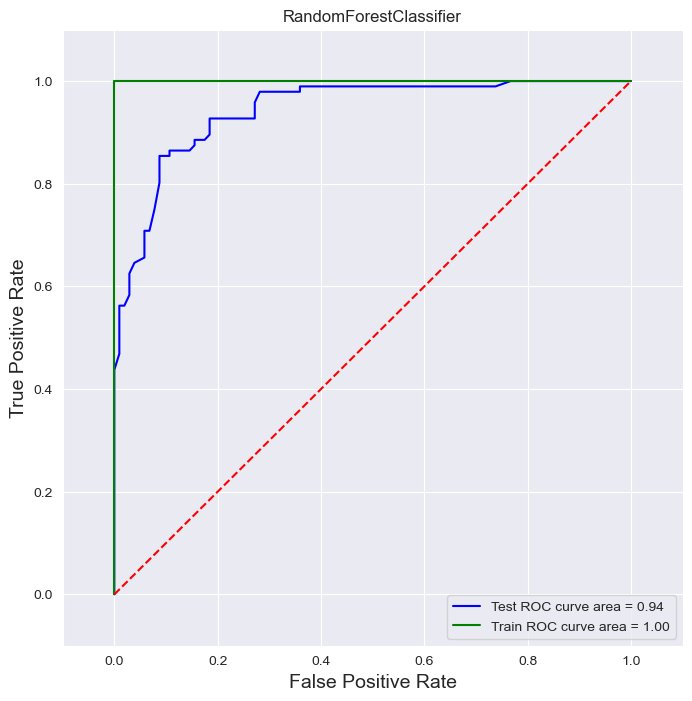

In [59]:
sns.set_style('darkgrid')
# calculate prediction probability
prob_train = np.squeeze(rfc.predict_proba(X_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(rfc.predict_proba(X_test)[:,1].reshape(1,-1))
 # false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
 # auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.title('RandomForestClassifier')
plt.show() 

.
- **Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.**

In [64]:
#confusion_matrix
from sklearn.metrics import confusion_matrix

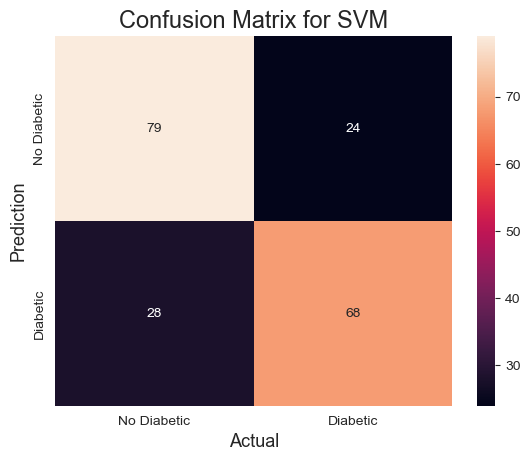

In [70]:
#compute the confusion matrix.
cm = confusion_matrix(y_test, ypred)
 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['No Diabetic','Diabetic'],
            yticklabels=['No Diabetic','Diabetic'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for SVM',fontsize=17)
plt.show()

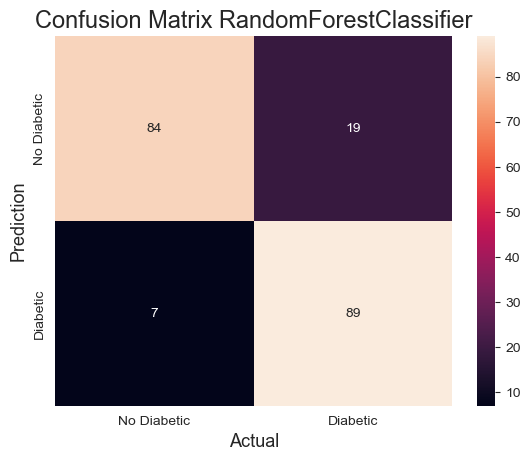

In [71]:
#compute the confusion matrix.
cm = confusion_matrix(y_test, y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['No Diabetic','Diabetic'],
            yticklabels=['No Diabetic','Diabetic'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix RandomForestClassifier',fontsize=17)
plt.show()

In [87]:
#comparing Algorithms
results = []
names = ['SVM','RandomForestClassifier']
accuracy = metrics.accuracy_score(y_test, ypred)*100
accuracy1 = metrics.accuracy_score(y_test, y_pred)*100

results=pd.DataFrame({'Model':['SVM','RandomForestClassifier'],
                     'Accuracy Score(%)':[accuracy,accuracy1]
                     })
results.set_index('Model')
results


,Model,Accuracy Score(%)
0,SVM,73.869347
1,RandomForestClassifier,86.934673


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- More than 200 people (almost 30%) in the dataset have skin thickness 0. What's going on?
- Glucose level could be a strong reason of diabetes.
- We could not detect any collaborative interaction effect between the predictors. 
- Random Forest Classifier Model have high accuracy in prediction.